**Initiating Azure**




In [ ]:
!pip install azure-cognitiveservices-vision-customvision

In [ ]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import time

**Model details**

In [ ]:
#Big data set
project_id = "55ea2262-3a09-4d16-9559-8171daf00c25"
ENDPOINT = "https://southcentralus.api.cognitive.microsoft.com/"
training_key = "77de383cbf434ad993114c8836fccfc8"
prediction_key = "77de383cbf434ad993114c8836fccfc8"
prediction_resource_id = "/subscriptions/67514f87-fc06-4ea6-b14a-ab01c46c9edc/resourceGroups/Test/providers/Microsoft.CognitiveServices/accounts/Trash"

In [ ]:
credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(ENDPOINT, credentials)
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [ ]:
project = trainer.get_project(project_id, custom_headers=None, raw=False)
project.id

CustomVisionErrorException: ignored

In [ ]:
iterations = trainer.get_iterations(project_id, custom_headers=None, raw=False)
iterations[1].id 

IndexError: ignored

In [ ]:
iteration = trainer.get_iteration(project.id, iterations[1].id) #get iteration data

IndexError: ignored

In [ ]:
iteration.status

NameError: ignored

In [1]:
import requests
import datetime
import os
import math
from PIL import Image, ImageDraw
import cv2
import numpy as np
import glob
import pandas as pd

**Fetching the Input Video**

In [14]:
url = 'https://player.vimeo.com/play/2390529508?s=515388373_1624757353_ff856ca29e92f81edaa73ee3e397a263&sid=82225dfd704a485878401fcdd71d235f042144fa1624746553&oauth2_token_id=&download=1'
r = requests.get(url, allow_redirects=True)

open('video.mp4', 'wb').write(r.content)

109599180

In [ ]:
def convertFpsToTime(Fps):
  seconds = Fps /30 
  return str(datetime.timedelta(seconds=seconds))

In [3]:
!mkdir buffers   #Folder to store input frames

In [4]:
!mkdir images   #Folder to store output frames

**Function to count the objects on each frame**

In [ ]:
#Function to process each input frame
def countImg(count):
  save_data = []
  font = cv2.FONT_HERSHEY_SIMPLEX
  with open("buffer" +str(count)+ ".jpg", mode="rb") as test_data:   #Importing input frame
    results = predictor.detect_image_with_no_store(project.id, "Iteration1",test_data)  #Sending it to the model
  image = cv2.imread("buffer" +str(count)+ ".jpg")   #Reading the input frame
  fish=0
  l1=[623,624,626,627,628,629]
  l2=[348,349,350,351,352,353]
  if count >1770 and count<2070:
    pred=.97
    tags=['bio']
  if count>3900 and count <4290:
    pred=.73
    tags=['rov']
  if count>5550 and count <5850:
    pred=.98
    tags=['bio']
  for i in results.predictions:
    if i.probability >pred and i.tag_name in tags:
      #Calculating bounding box size
      box = i.bounding_box
      h,w,_ = image.shape 
      start_point =(  math.floor( box.left * w)  , math.floor(box.top * h) )
      end_point =     math.floor( (box.left * w )+ box.width* w) , math.floor( (box.top * h) + box.height* h ) 
      color = (255, 0, 0)
      thickness = 2
      #Drawing bounding box
      if end_point[0] not in l1 and end_point[1] not in l2:
        image = cv2.rectangle(image,start_point,end_point,color, thickness)
      fish+=1
  # cv2.putText(image,'Count='+str(fish),(30,50), font, 2,(0,255,255),3)
  cv2.imwrite("../images/" +str(count)+ ".jpg" ,image )   #Exporting output frame
  return fish

In [9]:
!pwd

/content/buffers


In [ ]:
3 not in [2, 3, 4]

False

**Video Processing into frames**

In [15]:
cd buffers

/content/buffers


In [16]:
FishNum=[]   #List to store number of fish on each frame
cap = cv2.VideoCapture("../video.mp4")  #Importing the video
count=0
# TRACKER INITIALIZATION
success, frame = cap.read()


while(cap.isOpened()):
    ret, img = cap.read()
    if ret == False :
      break 
    cv2.imwrite("buffer" +str(count)+ ".jpg" ,img )  #Storing input frame
    print("read",count)
    cv2.imwrite("../images/" +str(count)+ ".jpg" ,img )
      # data = countImg(count)  #Pass the frame to be processed
    # else:
      #  cv2.imwrite("../images/" +str(count)+ ".jpg" ,img )
    # if count==2071:
    #   first=[3900,4290]
    # if count==4291:
    #   first=[5550,5850]

    # FishNum.append(data)
    count +=1

read 0
read 1
read 2
read 3
read 4
read 5
read 6
read 7
read 8
read 9
read 10
read 11
read 12
read 13
read 14
read 15
read 16
read 17
read 18
read 19
read 20
read 21
read 22
read 23
read 24
read 25
read 26
read 27
read 28
read 29
read 30
read 31
read 32
read 33
read 34
read 35
read 36
read 37
read 38
read 39
read 40
read 41
read 42
read 43
read 44
read 45
read 46
read 47
read 48
read 49
read 50
read 51
read 52
read 53
read 54
read 55
read 56
read 57
read 58
read 59
read 60
read 61
read 62
read 63
read 64
read 65
read 66
read 67
read 68
read 69
read 70
read 71
read 72
read 73
read 74
read 75
read 76
read 77
read 78
read 79
read 80
read 81
read 82
read 83
read 84
read 85
read 86
read 87
read 88
read 89
read 90
read 91
read 92
read 93
read 94
read 95
read 96
read 97
read 98
read 99
read 100
read 101
read 102
read 103
read 104
read 105
read 106


KeyboardInterrupt: ignored

In [17]:
cd ..

/content


In [ ]:
cd images

/content/images


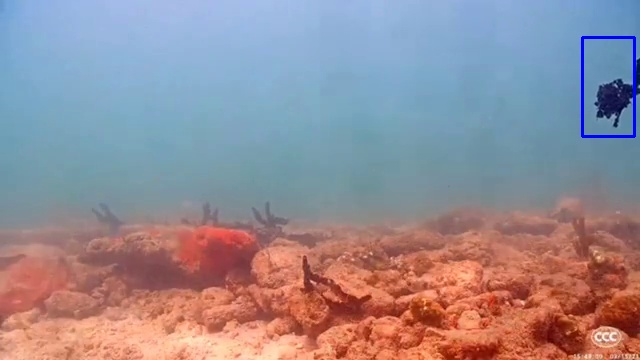

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
path=f'images/4270.jpg'
image = cv2.imread(path)
cv2_imshow(image)


**Converting output frames to  a video**

In [18]:
#Exporting the images to create the final video
img_array = []
scale_percent = 60 # percent of original size
for i in range(count):
    filename=f'images/{i}.jpg' 
    img = cv2.imread(filename)
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img_array.append(resized)
 
out = cv2.VideoWriter('project2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 6, dim)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

**Exporting the video to google drive**

In [ ]:
!gsutil -q -m cp project2.mp4 /content/drive/MyDrive/Azure1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!gsutil cp -r project2.mp4 /content/drive/MyDrive/Azure1

Copying file://project2.mp4...
/ [1 files][ 11.5 MiB/ 11.5 MiB]                                                
Operation completed over 1 objects/11.5 MiB.                                     


In [ ]:
!gsutil -q -m cp project5.mp4 /content/drive/MyDrive/Azure1

Storing the data into a CSV file

In [ ]:
OUTPUT = pd.DataFrame(FishNum)
OUTPUT.to_csv('Data1.csv')

In [ ]:
    ret, img_encode = cv2.imencode('.jpg', img)
    str_encode = img_encode.tostring()	#Convert array to binary type
    f4 = BytesIO(str_encode)
    f5 = BufferedReader(f4)		#Convert to _io.BufferedReader type